<a href="https://colab.research.google.com/github/SvetlanaTsim/recommendation_systems/blob/main/lesson_01/hw_1_rec_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1

На семинаре мы проходили метрики, необходимо реализовать некоторые из них

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.DataFrame({"user_id": ["u1","u2","u3"], 
              "recommended_list": [
                                      [143, 156, 1134, 991, 27],
                                      [1543, 3345, 533, 11, 43],
                                      [156, 3345, 10, 15, 1134]
                                  ],
             "bought_list": [
                             [156,27],
                             [11,43],
                             [1]
                            ]})
data

,user_id,recommended_list,bought_list
0,u1,"[143, 156, 1134, 991, 27]","[156, 27]"
1,u2,"[1543, 3345, 533, 11, 43]","[11, 43]"
2,u3,"[156, 3345, 10, 15, 1134]",[1]


In [6]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

In [7]:
flags = np.isin(bought_list, recommended_list)
flags

array([False, False,  True,  True])

In [8]:
flags * 1

array([0, 0, 1, 1])

In [9]:
flags_1 = np.isin(recommended_list, bought_list) * 1 
flags_1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## Задание 1. Реализовать метрики Recall@k и  Money Recall@k

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

$$\Large Recall@K(i) = \frac {\sum_{j=1}^{K}\mathbb{1}_{r_{ij}}}{|Rel_i|}$$

$\Large |Rel_i|$ -- количество релевантных товаров для пользователя $i$

$$\Large MoneyRecall@K(i) = \frac {\sum_{j=1}^{K}\mathbb{1}_{r_{ij}}\cdot Price(j)}{\sum_{s\in Rel_i}Price(s)}$$


Precision - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров юзер купил

Recall - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

In [10]:
def recall_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    #TODO: Ваш код здесь
    flags = np.isin(recommended_list[:k], bought_list) * 1

    recall = flags.sum() / len(bought_list)
    
    return recall #Добавьте сюда результат расчета метрики


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    prices_recommended = np.array(prices_recommended)
    prices_bought = np.array(prices_bought)

    #TODO: Ваш код здесь
    recommended_list = recommended_list[:k]
    prices_recommended = prices_recommended[:k]
    flags = np.isin(recommended_list, bought_list) * 1 

    money_recall = (flags * prices_recommended).sum() / prices_bought.sum()
    
    return money_recall #Добавьте сюда результат расчета метрики

In [11]:
recall_at_k(recommended_list, bought_list, k=5)

0.5

In [12]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

prices_recommended = [400, 60, 40, 40, 90, 400, 60, 40, 40, 90]  
prices_bought = [500, 20, 400, 40]

In [13]:
flags = np.isin(recommended_list, bought_list) * 1
flags

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [14]:
money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5)

0.4583333333333333

## Задание 2. Реализовать метрику MRR@k

Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $\Large rank_j$
- Посчитать reciprocal rank = $\Large\frac{1}{rank_j}$

$$\Large  MMR(i)@k=\frac {1}{\min\limits_{j\in Rel(i)} rank_j}$$

In [15]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

In [16]:
flags_1 = np.isin(recommended_list, bought_list) * 1 
flags_1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [34]:
idx = np.array(np.where(flags_1 == 1)[0])

idx

array([0, 3])

In [36]:
idx += 1

In [37]:
idx

array([1, 4])

In [35]:
idx.shape

(2,)

In [40]:
1 / idx

array([1.  , 0.25])

Если оценить пример выше, получается, у 1го совпадения ранг 1/1 у второго 1/4. Итого:

$$MRR = \frac{1.25}{2} = 0.625$$

In [50]:
def mrr_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    #TODO: Ваш код здесь
    recommended_list = recommended_list[:k]
    flags = np.isin(recommended_list, bought_list) * 1 
    ranks = 1 / (np.array(np.where(flags == 1)[0]) + 1)
    mrr_k = ranks.sum() / len(ranks)
    
    return mrr_k #Добавьте сюда результат расчета метрики

In [51]:
mrr_at_k(recommended_list, bought_list, k=5)

0.625

## Задание 3*. Реализовать метрику nDCG@k
Normalized discounted cumulative gain. Эту метрику реализовать будет немного сложнее.

$$\Large DCG@K(i) = \sum_{j=1}^{K}\frac{\mathbb{1}_{r_{ij}}}{\log_2 (j+1)}$$


$\Large \mathbb{1}_{r_{ij}}$ -- индикаторная функция показывает что пользователь $i$ провзаимодействовал с продуктом $j$

Для подсчета $nDCG$ нам необходимо найти максимально возможный $DCG$ для пользователя $i$  и рекомендаций длины $K$.
Максимальный $DCG$ достигается когда мы порекомендовали максимально возможное количество релевантных продуктов и все они в начале списка рекомендаций.

$$\Large IDCG@K(i) = max(DCG@K(i)) = \sum_{j=1}^{K}\frac{\mathbb{1}_{j\le|Rel_i|}}{\log_2 (j+1)}$$

$$\Large nDCG@K(i) = \frac {DCG@K(i)}{IDCG@K(i)}$$

$\Large |Rel_i|$ -- количество релевантных продуктов для пользователя $i$



In [52]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

In [53]:
flags_1 = np.isin(recommended_list, bought_list) * 1 
flags_1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [54]:
idx = np.array(np.where(flags_1 == 1)[0])

idx

array([0, 3])

In [55]:
idx += 1

In [56]:
idx

array([1, 4])

In [60]:
np.log2(idx + 1)

array([1.        , 2.32192809])

In [63]:
dcg = (1 / (np.log2(idx + 1))).sum()
dcg 

1.4306765580733931

In [73]:
#Посчитаем идеальный вариант (то есть совпадения 1х элементов)
idx_i = np.arange(len(idx)) + 1
idcg = (1 / (np.log2(idx_i + 1))).sum()
idcg

1.6309297535714575

In [70]:
ndcg = dcg / idcg
ndcg 

0.8772153153380493

In [74]:
def ndcg_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    #TODO: Ваш код здесь
    recommended_list = recommended_list[:k]
    flags = np.isin(recommended_list, bought_list) * 1 
    idxs = (np.array(np.where(flags == 1)[0]) + 1)
    dcg = (1 / (np.log2(idx + 1))).sum()
    #теперь idcg
    ideal_idxs = np.arange(len(idxs)) + 1 
    idcg = (1 / (np.log2(ideal_idxs + 1))).sum()
    
    ndcg = dcg / idcg
    return ndcg  #Добавьте сюда результат расчета метрики
    

In [75]:
ndcg_at_k(recommended_list, bought_list, k=5)

0.8772153153380493

Посчитаем NDCG@k на базе оценок пользователей (то есть не 1, а оценки). Смысл изображен ниже.

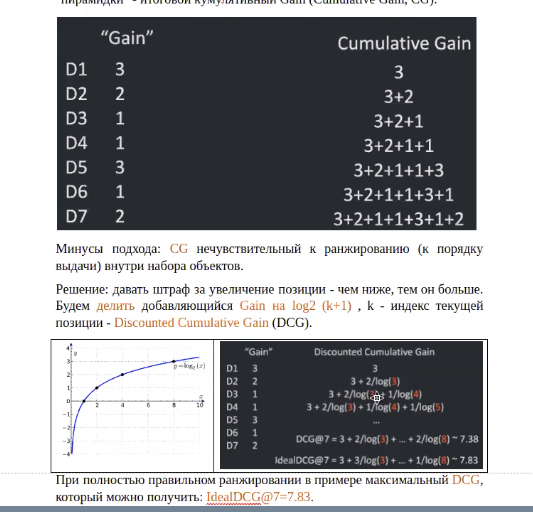

In [76]:
gain = [3, 2, 1, 1, 3, 1, 2]

In [77]:
np.sort(gain)

array([1, 1, 1, 2, 2, 3, 3])

In [78]:
np.sort(gain)[::-1] 

array([3, 3, 2, 2, 1, 1, 1])

In [79]:
def ndcg_at_k(gain, k=5):
    gain = np.array(gain)
    gain = gain[:k]
    idxs = np.arange(len(gain)) + 1 
    dcg = (gain / (np.log2(idxs + 1))).sum()

    #теперь idcg
    ideal_gain = np.sort(gain)[::-1] 
    idcg = (ideal_gain / (np.log2(idxs + 1))).sum()    
    ndcg = dcg / idcg
    return ndcg  #Добавьте сюда результат расчета метрики

In [83]:
ndcg_at_k(gain, k=7)

0.9419493913323128

Совпадает с результатом из учебного примера:

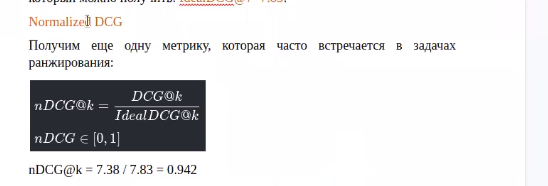